### Read data

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("assignment_rev2.csv.xls")

In [3]:
df.head(5)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,...,False,True,False,True,True,False,False,False,False,True


We have in total 15447 data points

### Clean data

**Replace/Remove NaN**

In [4]:
df.isnull().sum()

id                             0
ranking_score                  0
agent_id                     104
geography_name                 0
sq_meters                      0
price                          0
year_of_construction           0
floor                        732
subtype                        0
rooms                          0
no_of_bathrooms                0
energy_class               13340
renovation_year            13380
no_of_wc                       0
ad_type                        0
living_rooms                   0
kitchens                       0
balcony_area                   0
lux_home                    4238
new_development             3606
garage                      1630
furnished                   4169
preserved                   5433
investment                  4964
unfinished                  5420
equipped                   15447
heating_under_floor         4677
renovated                   4329
requires_renovation         4882
airy                        3518
bright    

In [5]:
# remove NAs from agent_id as this is information we want to have and only ~0.7% of the data will be dropped
df.dropna(axis = 0, subset = ["agent_id"], inplace = True)

# remove NAs from floor as this is information we want to have and only ~5% of the data will be dropped
df.dropna(axis = 0, subset = ["floor"], inplace = True)

# column equipped contains only NA values - so drop the entire column from df
df.drop(columns=['equipped'], inplace = True)

# column energy_class contains ~95% NA values - so drop the entire column from df
df.drop(columns=['energy_class'], inplace = True)

# ASSUMPTION: for values in binary columns, the NA is in reality a 0 - ie there is not such item in the property
## we will do this when cleaning the data types (look below)

# NA in renovation_year means that the property has not been renovated and this is important information so we will not change it
# however since we only have values for 14% of the data points, then might do some feature engineering later on - eg binary value: renovated 1/0

In total have dropped only ~5% of the data. Now we have 14614 data points.

**Clean data types**

In [6]:
# change agent_id and renovation_year from float to int
df['agent_id'] = df['agent_id'].astype('Int64')
df['renovation_year'] = df['renovation_year'].astype('Int64')

# floor: replace str values with numbers to change from object to int
df['floor'].replace({'ground-floor': 0, 'basement': -1, 'semi-basement': -0.5, 'mezzanine': 0.5}, inplace=True)
df['floor'] = df['floor'].astype('float')

# change all object/boolean to int/binary
# ASSUMPTION: for values in binary columns, the NA is in reality a 0 - ie there is not such item in the property
for a in df.select_dtypes(include=object):
    try:
        df[a].replace({False: 0, True: 1}, inplace=True)
        df[a] = df[a].astype('Int64')
        df[a] = df[a].fillna(0)
    except:
        pass

**Deeper look into the highlighted variables mentioned in assignment**

/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_96934/1585622511.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


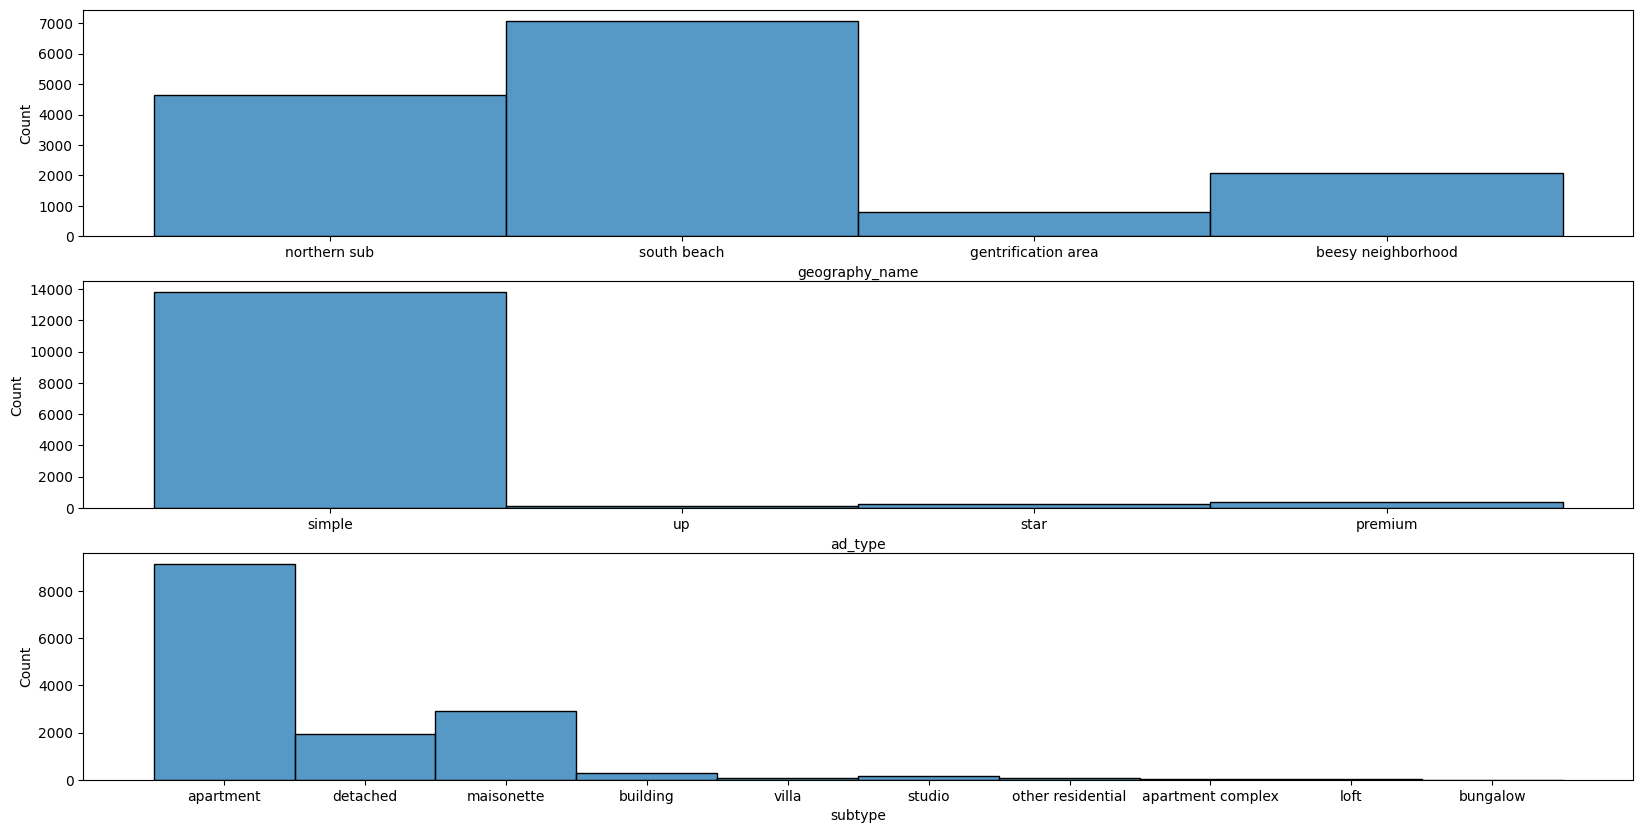

In [7]:
# Plot histograms for the categorical features

fig, ax = plt.subplots(3,1, figsize=(20,10))
sns.histplot(df['geography_name'], ax = ax[0])
sns.histplot(df['ad_type'], ax = ax[1])
sns.histplot(df['subtype'], ax = ax[2])
fig.show()

/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_96934/2049019640.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


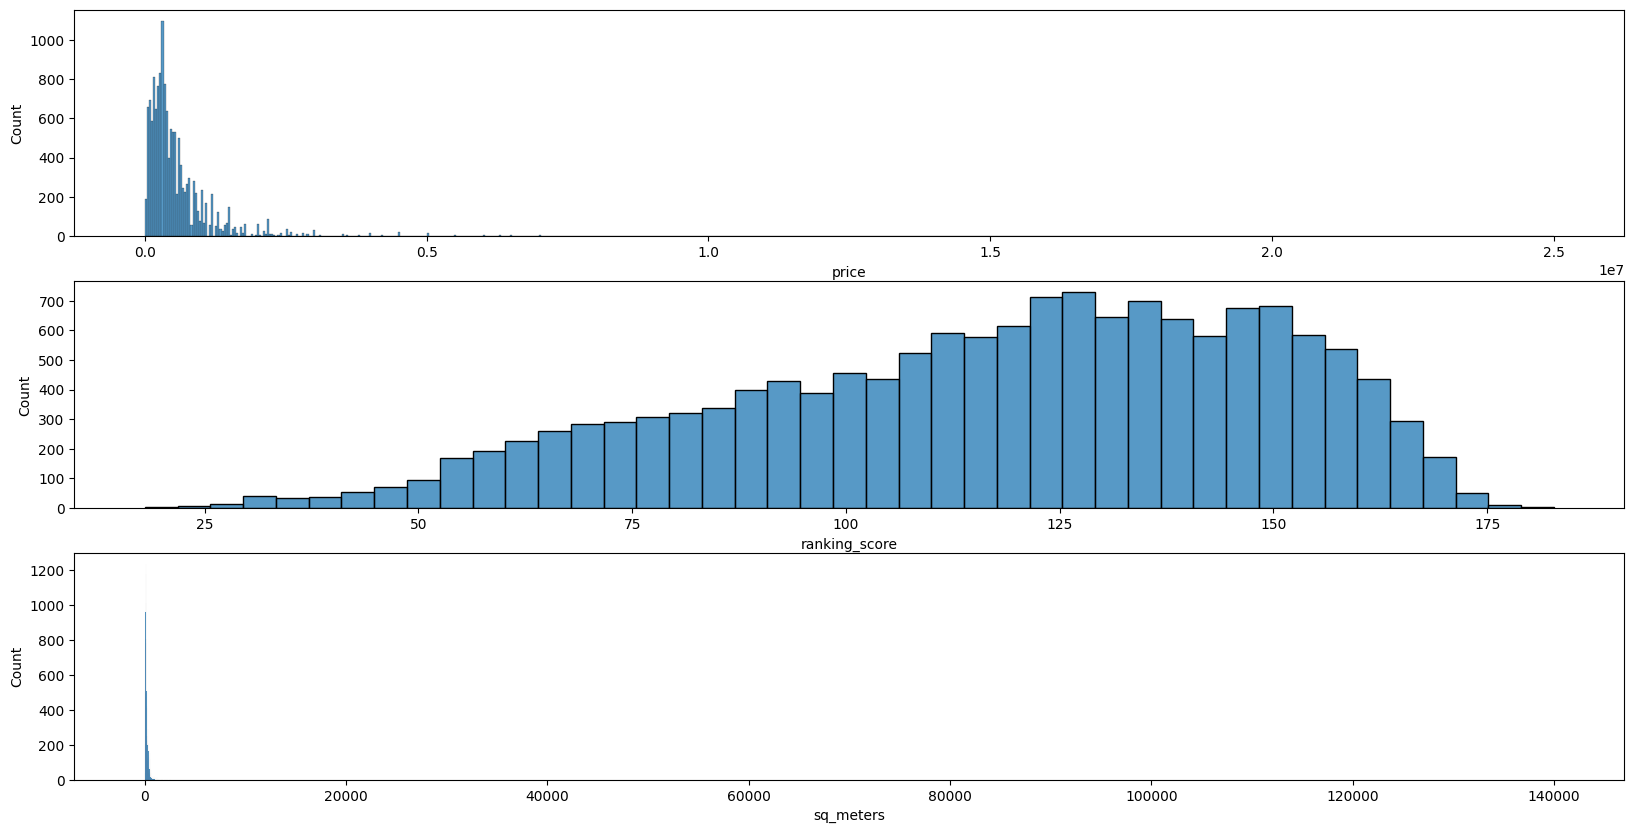

In [8]:
# Plot histograms for the numerical features

fig, ax = plt.subplots(3,1, figsize=(20,10))
sns.histplot(df['price'], ax = ax[0])
sns.histplot(df['ranking_score'], ax = ax[1])
sns.histplot(df['sq_meters'], ax = ax[2])
fig.show()

From the above histograms, we can clearly see that there are outliers in price and sq_meters which need to be treated

**Remove outliers**

/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_96934/1251574918.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


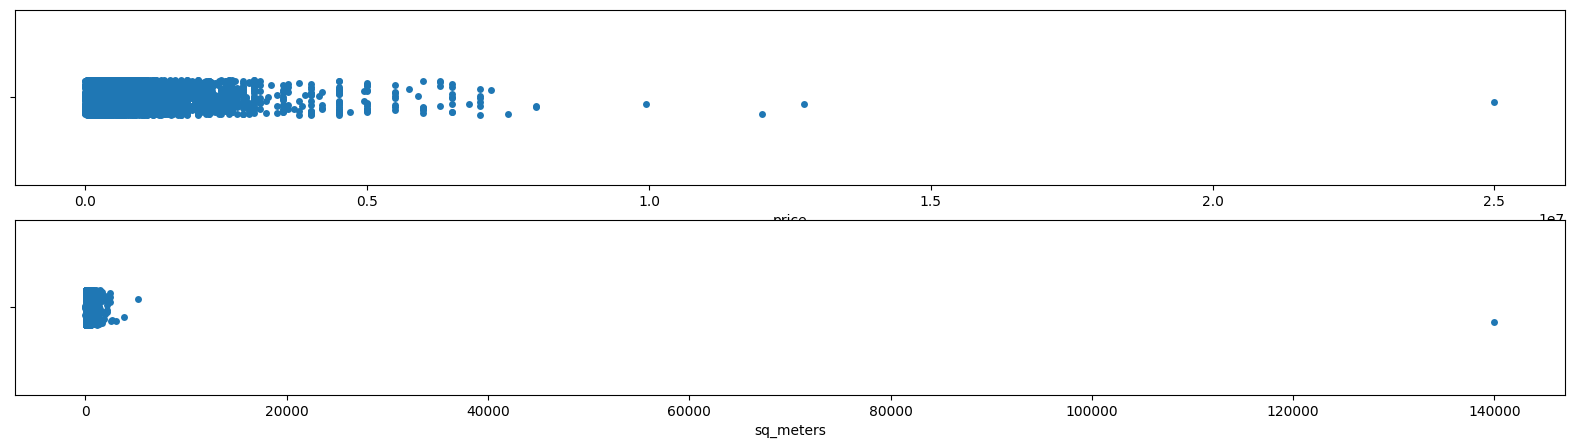

In [9]:
# plot for every numeric variable a stripplot to identify outliers

fig, ax = plt.subplots(2,1, figsize=(20,5))
sns.stripplot(df['price'], ax = ax[0], orient = 'h')
sns.stripplot(df['sq_meters'], ax = ax[1], orient = 'h')
fig.show()

In [10]:
# remove outliers based on z-score

df = df[(np.abs(stats.zscore(df[['price', 'sq_meters']])) < 3).all(axis=1)]
df.reset_index(drop = True, inplace = True)
df

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680,northern sub,567,200000,2005,1.0,apartment,4,...,0,0,0,0,0,0,0,0,0,0
1,43018583,134.7,15502,northern sub,642,550000,1992,0.0,detached,5,...,0,1,0,1,1,0,0,1,0,1
2,39670968,71.0,9807,northern sub,320,500000,2009,0.0,detached,2,...,0,0,0,1,0,0,0,0,0,0
3,39740833,122.0,14682,northern sub,95,230000,2007,1.0,apartment,3,...,0,1,0,1,1,0,0,0,0,0
4,39742998,126.7,14682,northern sub,195,370000,2007,0.0,maisonette,4,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,43079210,101.0,19009,beesy neighborhood,80,75000,1960,3.0,apartment,2,...,0,0,0,0,0,0,0,0,0,0
14388,43079212,103.5,19009,beesy neighborhood,69,70000,1975,2.0,apartment,2,...,0,0,0,0,0,0,0,0,0,0
14389,43079508,118.1,6976,beesy neighborhood,75,120000,1974,3.0,apartment,1,...,0,1,0,0,0,0,0,0,0,0
14390,40498665,78.7,7354,beesy neighborhood,800,600000,1930,0.0,building,1,...,0,0,0,0,0,0,0,0,0,0


/var/folders/sf/x69fjdzx605fn55k8l21h2yc0000gn/T/ipykernel_96934/1251574918.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


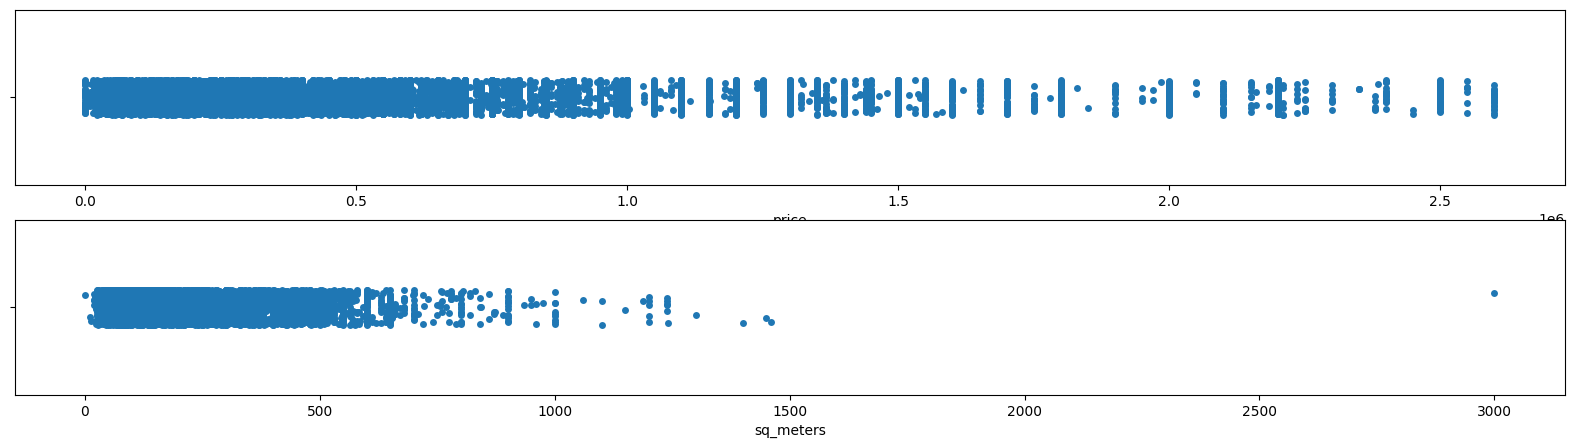

In [11]:
# plot for every numeric variable a stripplot to identify outliers

fig, ax = plt.subplots(2,1, figsize=(20,5))
sns.stripplot(df['price'], ax = ax[0], orient = 'h')
sns.stripplot(df['sq_meters'], ax = ax[1], orient = 'h')
fig.show()

### Part 1

**Calculate the mean, median, and standard deviation of property prices**

In [12]:
# by subtype
subtype_stats = df.groupby('subtype')['price'].agg(['mean', 'median', 'std']).round(2)

# by area
area_stats = df.groupby('geography_name')['price'].agg(['mean', 'median', 'std']).round(2)

# by area and subtype
stats = df.groupby(['subtype', 'geography_name'])['price'].agg(['mean', 'median', 'std']).round(2)


print("Statistics by subtype:\n", subtype_stats)
print("\nStatistics by area:\n", area_stats)
print("\nStatistics by subtype and area:\n", stats)


Statistics by subtype:
                          mean     median        std
subtype                                            
apartment           352358.03   290000.0  292769.84
apartment complex   996447.39   975000.0  556733.36
building            833295.16   665000.0  491431.14
bungalow             66500.00    66500.0    2121.32
detached            947534.65   850000.0  546956.73
loft                553272.73   369000.0  357646.78
maisonette          749111.15   620000.0  461780.81
other residential   651321.88   510000.0  485695.12
studio               57725.90    50000.0   42350.08
villa              1351260.87  1165000.0  571436.61

Statistics by area:
                           mean    median        std
geography_name                                     
beesy neighborhood   132187.87   95000.0  136837.16
gentrification area  242363.41  190000.0  234019.94
northern sub         668658.62  550000.0  437312.43
south beach          567787.88  400000.0  454765.10

Statistics by sub

**Plot property prices against subtypes and area**

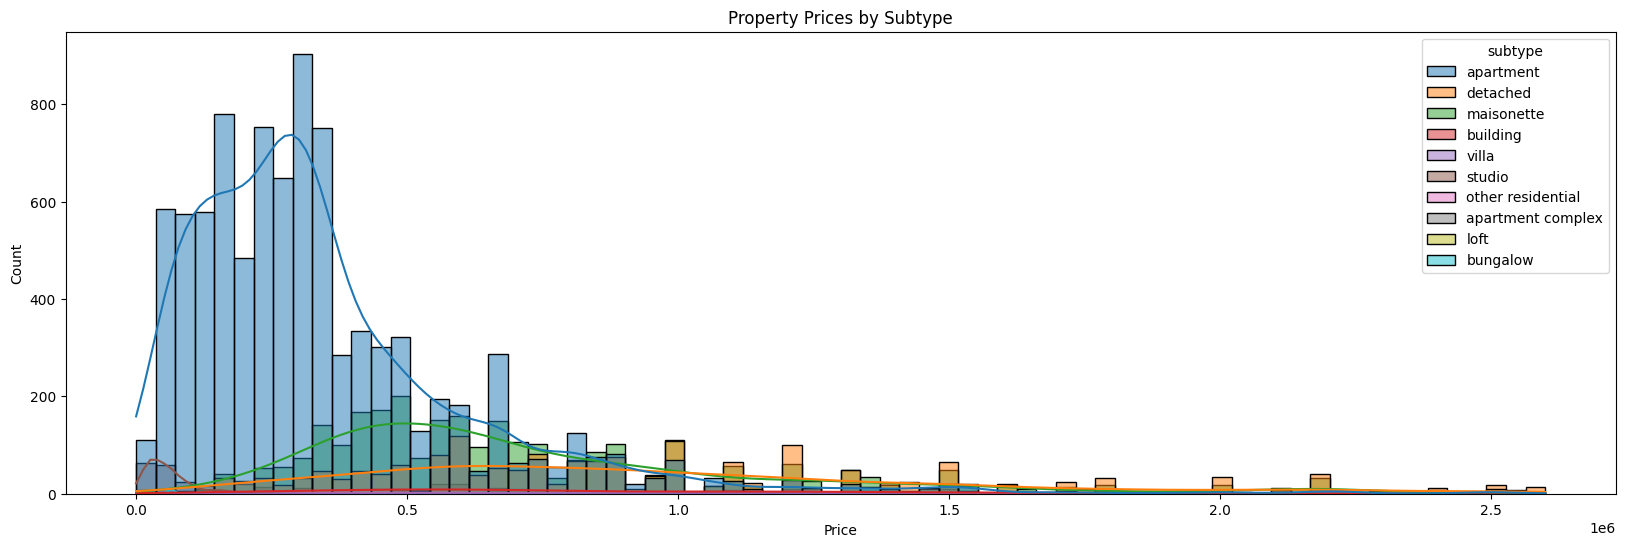

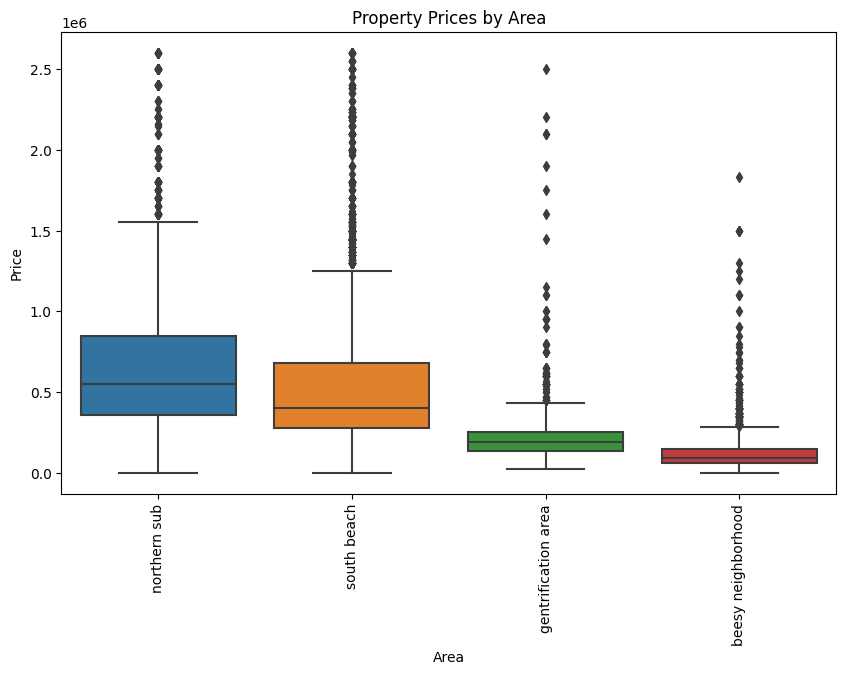

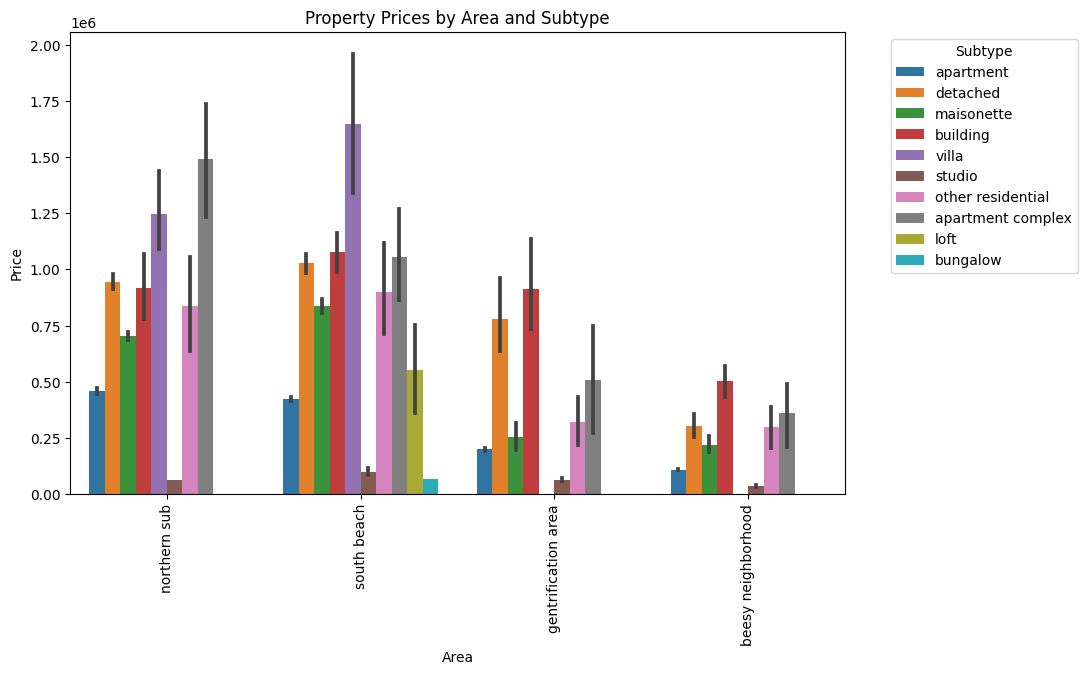

In [13]:
# histogram of property prices by subtype
plt.figure(figsize=(20,6))
sns.histplot(data=df, x='price', hue='subtype', kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Property Prices by Subtype')
plt.show()

# boxplot of property prices by area
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='geography_name', y='price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Property Prices by Area')
plt.xticks(rotation=90)
plt.show()

# grouped barchart of property prices by area and subtype
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='geography_name', y='price', hue='subtype')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Property Prices by Area and Subtype')
plt.xticks(rotation=90)
plt.legend(title='Subtype', bbox_to_anchor=(1.05, 1))
plt.show()


**Insights generated**

There are several insights that can be drawn from the statistics presented:

- The most expensive property type on average is villa, with a mean price of 1351260.87 and a median of 1165000.0, followed by detached houses with a mean of 947534.65 and a median of 850000.0.
- The cheapest type of property on average is a studio with a mean price of 57725.90 and a median of 50000.0.
- The subtype with the highest standard deviation in price is the apartment complex, which has a mean price of 996447.39 and a standard deviation of 556733.36.
- The most expensive geographic area on average is the south beach, with a mean price of 567787.88 and a median of 400000.0. The northern sub follows closely, with a mean price of 668658.62 and a median of 550000.0.
- The cheapest geographic area on average is beesy neighborhood, with a mean price of 132187.87 and a median of 95000.0.

Looking at the statistics by subtype and area:

- The most expensive subtype in the most expensive area (South Beach) is villa, with a mean price of 1646666.67 and a median of 1575000.0. In the cheapest area (Beesy Neighborhood), the most expensive subtype is building, with a mean price of 502372.09 and a median of 445000.0.

- In the "apartment" subtype, we can see that the average price in the "beesy neighborhood" area is much lower than the average price in the other three areas, with a mean price of 107,432.45 compared to 459,241.94 in the "northern sub" area, 423,937.50 in "south beach" and 197,956.52 in the "gentrification area". Similarly, we can see that the highest average price for apartments is in the "northern sub" area, with a mean price of 668,658.62, and the lowest average price is in the "beesy neighborhood" area, with a mean price of 132,187.87.

- We can observe similar trends for other subtypes as well. For instance, the "apartment complex" subtype has the highest average prices in the "northern sub" area and the lowest average prices in the "beesy neighborhood" area. On the other hand, "villa" properties have the highest average prices in the "south beach" area, with a mean price of 1,646,666.67, and the highest standard deviation among all the subtypes and areas.